In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.formula.api as smf
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
df_raw = pd.read_csv('../data/raw/dataset.csv', index_col=0)

In [9]:
#Para que me muestre todas las columnas
pd.set_option('display.max_columns',110)

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3140 entries, 1001 to 56045
Columns: 107 entries, TOT_POP to Urban_rural_code
dtypes: float64(61), int64(44), object(2)
memory usage: 2.6+ MB


In [11]:
df_raw.describe()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
count,3.140000e+03,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3.140000e+03,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3.140000e+03,3140.000000,3140.00000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000,3140.000000
mean,1.041894e+05,1.274030e+04,11.871051,1.336798e+04,12.694609,1.446933e+04,12.283979,1.391649e+04,11.751535,1.288521e+04,11.556685,1.363803

In [12]:
df_raw.sample(10)

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40083,47291,5680,12.010742,7065,14.939418,5570,11.778140,5980,12.645112,5922,12.522467,6368,13.465564,5807,12.279292,3258,6.889260,1641,3.470005,39076,82.628830,3969,8.392717,1723,3.643399,317,0.670318,30,0.063437,2176,4.601298,47291,458,2156,11.0,7.9,3.1,0.3,6.4,6.7,2964,9683,9213,8331,9.8,32.1,30.5,27.6,4745,10.4,13.7,13.2,69114,65505,72723,21953,21290,663,3.0,69114,133.1,206.7,189.1,73.9,68.5,6.2,5.8,13.564557,15.447524,1.499177,15.819320,27.105128,55.913321,0,45326,9257,20.4,Logan,Oklahoma,40,83,36422,43.5,41.3,45.5,15834,32.3,30.8,33.9,11764,7.9,7.2,8.6,2863,8.1,6.9,9.3,2940,11.4,10.6,12.2,4155,3.0,2.8,3.2,1092,2
42025,64227,6333,9.860339,7240,11.272518,6716,10.456662,7144,11.123048,8003,12.460492,10012,15.588460,9588,14.928301,5931,9.234434,3260,5.075747,61335,95.497221,1452,2.260731,222,0.345649,371,0.577639,60,0.093419,787,1.225341,64227,362,700,9.2,12.5,-3.2,0.2,8.7,8.9,4873,21390,12894,7899,10.4,45.5,27.4,16.8,7522,11.9,19.1,16.7,53901,49480,58322,31526,29929,1597,5.1,53901,88.5,320.5,273.3,100.8,88.2,8.7,7.2,35.119823,28.429855,0.997979,52.035311,36.127832,134.235657,13,63987,17239,26.9,Carbon,Pennsylvania,42,25,51852,41.6,39.4,43.8,21569,31.9,30.2,33.6,16541,8.4,7.6,9.3,4375,9.1,7.8,10.4,4706,12.4,11.4,13.4,6425,3.3,3.1,3.6,1724,3
34023,829685,97458,11.746386,106

In [14]:
df = df_raw.copy()

In [15]:
#Hacemos una lista de variables
list(df.columns)


['TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 20

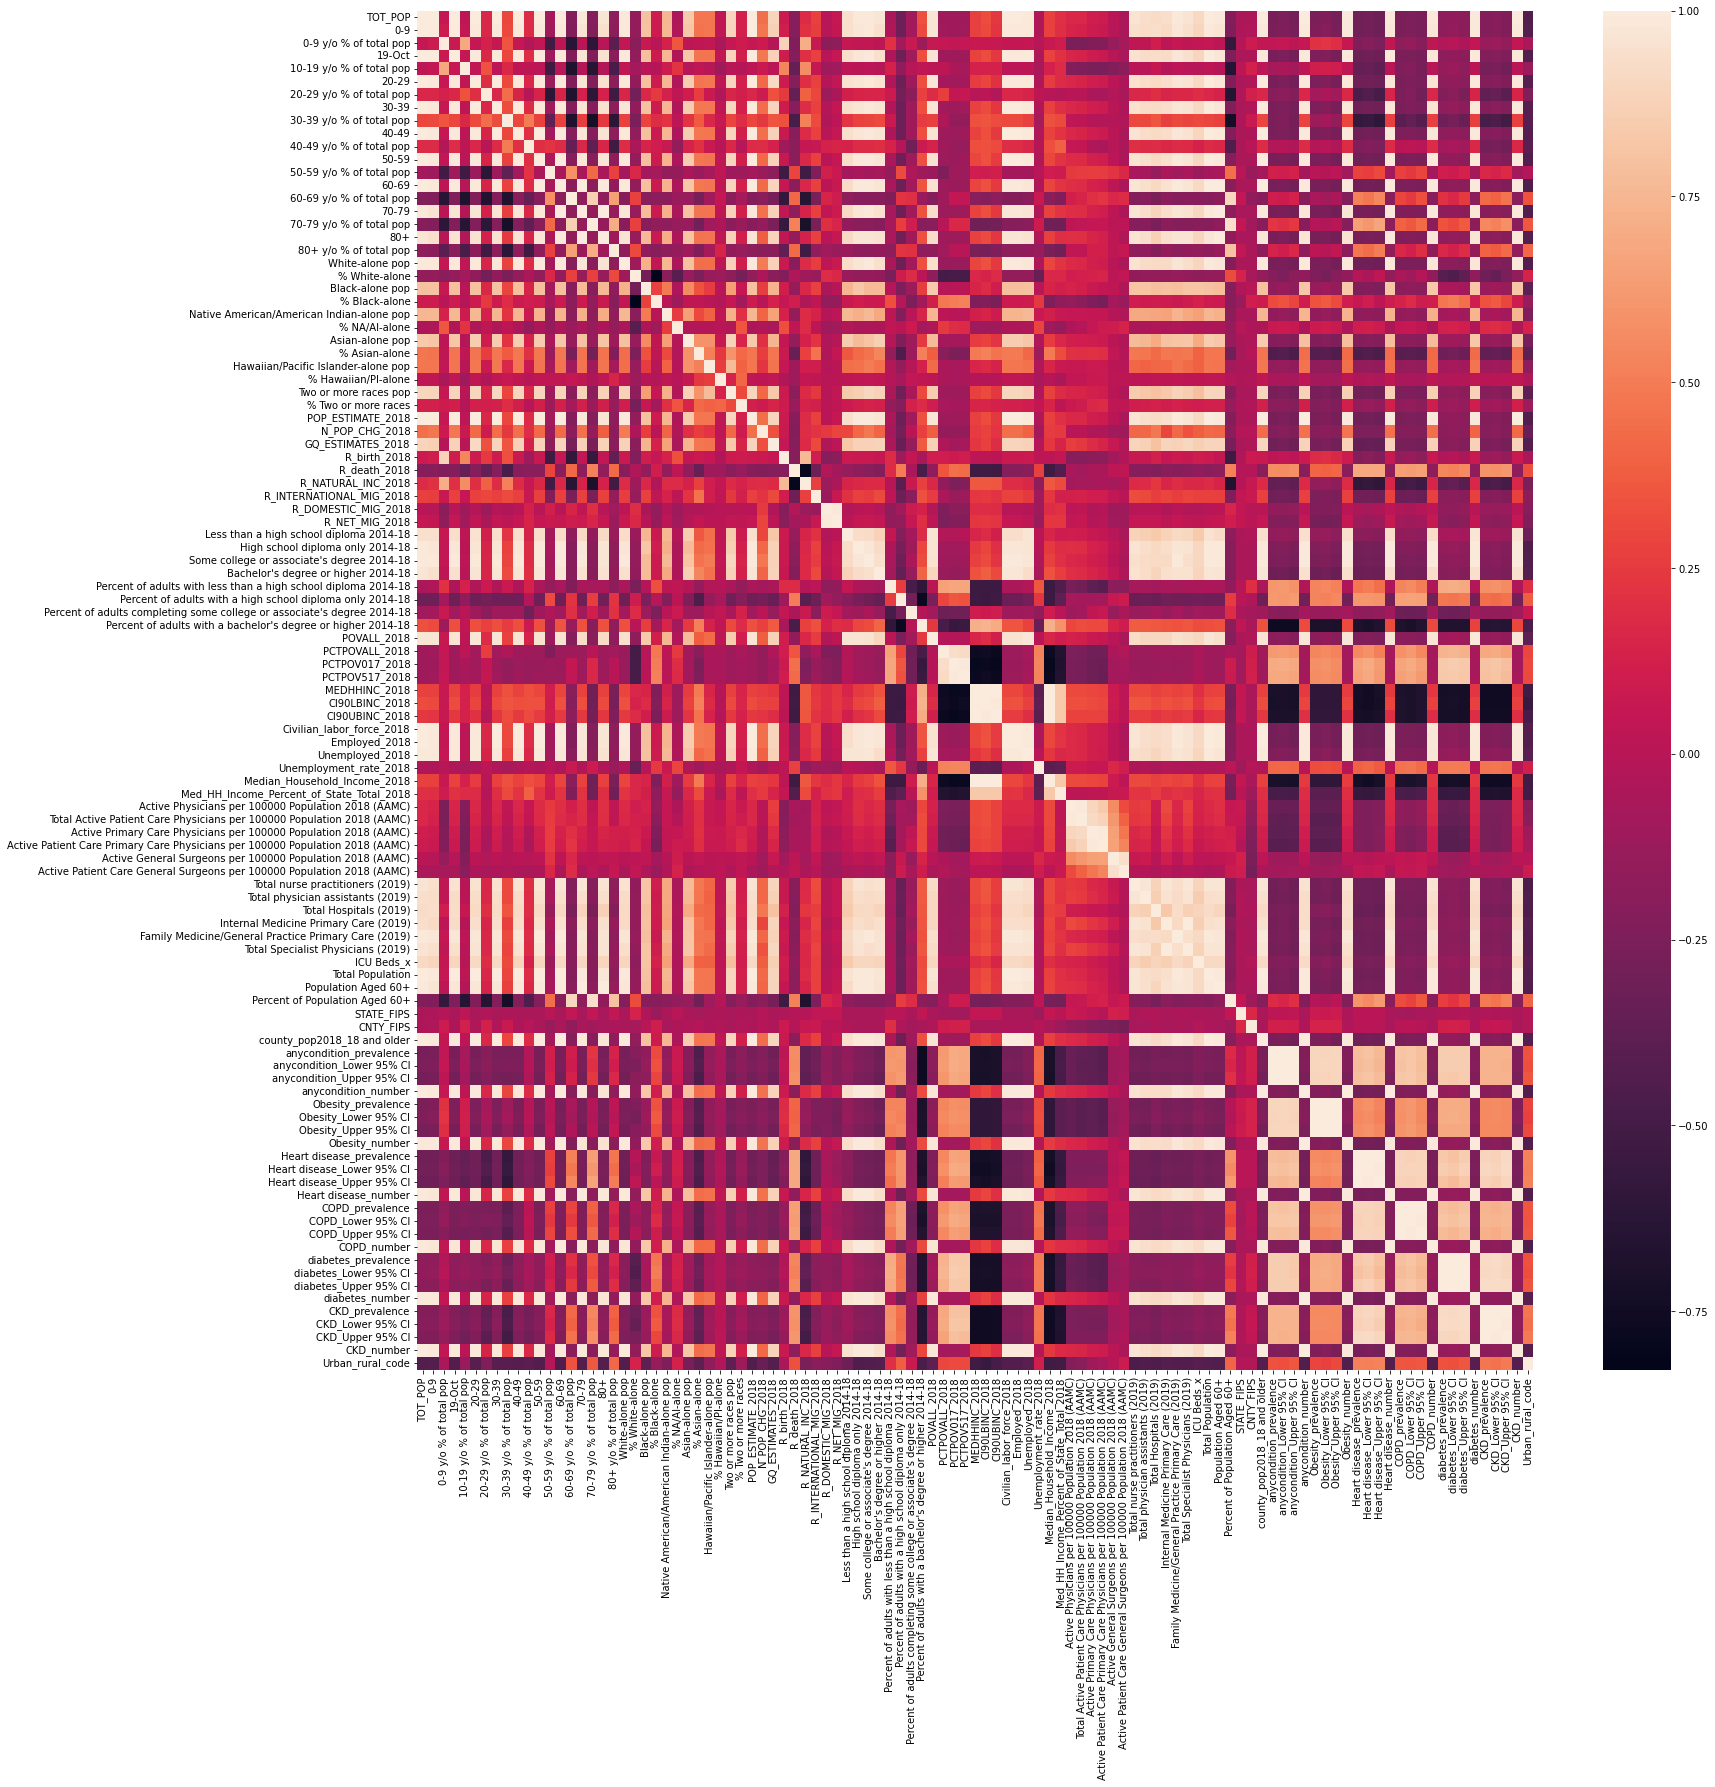

In [20]:
# Step 2
#Hacemos el EDA para ver que hacemos
#Vemos las vas de salud y vemos algunas, me pude hacer la regresión, busco qué vars 

#Matriz de correlación
plt.figure(figsize=(25,25))

corr_matrix = df.corr()
#Hacemo mapa de calor
heat_map = sns.heatmap(corr_matrix,annot=False)

# Las zonas más oscuras a NEGRAS son correlaciones negativas altas
# Las zonas más claras a BLANCAS son correlaciones positivas altas
# vemos qué grupo
# elegimos una variable, Camila nos pasa un código , vemos la var y aplicamos LASO

In [21]:
print(corr_matrix)

                           TOT_POP       0-9  0-9 y/o % of total pop  \
TOT_POP                   1.000000  0.994010                0.052507   
0-9                       0.994010  1.000000                0.085920   
0-9 y/o % of total pop    0.052507  0.085920                1.000000   
19-Oct                    0.994596  0.997487                0.074714   
10-19 y/o % of total pop  0.023384  0.048341                0.687844   
...                            ...       ...                     ...   
CKD_prevalence           -0.218731 -0.216430               -0.133841   
CKD_Lower 95% CI         -0.202895 -0.200512               -0.117138   
CKD_Upper 95% CI         -0.230914 -0.229570               -0.153847   
CKD_number                0.993889  0.985337                0.040384   
Urban_rural_code         -0.428608 -0.423641               -0.050916   

                            19-Oct  10-19 y/o % of total pop     20-29  \
TOT_POP                   0.994596                  0.023384 

Código para sacar las variables que están fuertemente relacionadas


In [28]:
#Vamos a predecir la prevalencia de las enfermedades al corazón: 'Heart disease_prevalence'

#Obtenermos lo valores de correlación con Heart disease_prevalence
df_heart_disease = pd.DataFrame(df.corrwith(df['Heart disease_prevalence'], axis=0), columns=['Correlacion'])
df_heart_disease

,Correlacion
TOT_POP,-0.300905
0-9,-0.302992
0-9 y/o % of total pop,-0.229493
19-Oct,-0.311823
10-19 y/o % of total pop,-0.354149
...,...
CKD_prevalence,0.892792
CKD_Lower 95% CI,0.874806
CKD_Upper 95% CI,0.908082
CKD_number,-0.267543


In [30]:
#Filtramos y vemos los que son mayores a X número, para establecer cierto umbral
df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8] # esto nos da las vars que vamos a sacar del modelo, las dropeamos


,Correlacion
Heart disease_prevalence,1.000000
Heart disease_Lower 95% CI,0.997441
Heart disease_Upper 95% CI,0.997752
COPD_prevalence,0.886726
COPD_Lower 95% CI,0.877945
COPD_Upper 95% CI,0.890111
diabetes_prevalence,0.831021
diabetes_Lower 95% CI,0.806340
diabetes_Upper 95% CI,0.850717
CKD_prevalence,0.892792


In [33]:
df_heart_disease[abs(df_heart_disease['Correlacion']) > 0.8].index # la lists de las vars a eliminar

Index(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'],
      dtype='object')

In [39]:
X = df.drop(['Heart disease_prevalence', 'Heart disease_Lower 95% CI',
       'Heart disease_Upper 95% CI', 'COPD_prevalence', 'COPD_Lower 95% CI',
       'COPD_Upper 95% CI', 'diabetes_prevalence', 'diabetes_Lower 95% CI',
       'diabetes_Upper 95% CI', 'CKD_prevalence', 'CKD_Lower 95% CI',
       'CKD_Upper 95% CI'], axis=1)

y = df['Heart disease_prevalence']

In [40]:
X.sample(5)

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40067,6123,823,13.441124,787,12.853177,643,10.501388,669,10.926017,638,10.419729,813,13.277805,850,13.882084,597,9.750122,303,4.948555,5283,86.281235,94,1.535195,417,6.810387,37,0.604279,2,0.032664,290,4.736240,6123,-52,144,9.8,12.4,-2.6,0.3,-6.0,-5.7,725,1672,1255,588,17.1,39.4,29.6,13.9,1473,24.7,37.9,38.5,37338,34021,40655,2570,2482,88,3.4,37338,71.9,206.7,189.1,73.9,68.5,6.2,5.8,1.756270,2.000067,0.194106,2.048206,3.509435,7.239375,0,6270,1681,26.8,Jefferson,Oklahoma,40,67,4645,58.2,56.2,60.1,2705,41.9,40.2,43.5,1946,549,567,767,197,6
8089,18432,2315,12.559679,2681,14.545356,2165,11.745877,2086,11.317274,1981,10.747613,2237,12.136502,2389,12.961155,1569,8.512370,1009,5.474175,16616,90.147569,323,1.752387,689,3.738064,177,0.960286,39,0.211589,588,3.190104,18432,29,558,11.5,11.5,-0.1,0.1,1.6,1.7,1797,3588,4714,2172,14.6,29.2,38.4,17.7,3722,20.8,29.9,28.2,40064,36233,43895,8635,8205,430,5.0,40064,55.7,285.7,262.5,95.4,88.9,7.8,7.1,9.368807,7.271748,0.288022,8.100216,8.812180,23.588682,506,18325,4816,26.3,Otero,Colorado,8,89,14022,42.9,41.0,44.6,6010,30.3,29.1,31.5,4249,1200,1139,1804,559,6
40135,41179,4977,12.086258,5423,13.169334,4977,12.086258,4631,11.246023,5109,12.406809,5713,13.873576,5003,12.149397,3592,8.722893,1754,4.259453,26873,65.258991,773,1.877170,9125,22.159353,274,0.665388,37,0.089852,4097,9.949246,41179,-155,463,12.5,13.7,-1.2,0.4,-3.0,-2.6,5432,10870,8196,3748,19.2,38.5,29.0,13.3,7636,18.8,28.4,27.5,38998,35386,42610,16406,15699,707,4.3,38998,75.1,206.7,189.1,73.9,68.5,6.2,5.8,11.811442,13.451050,1.305420,13

In [38]:
# Vemos las observaciones que tenemos para las columnas
df.shape

(3140, 107)

In [44]:
df.describe(include='O')

,COUNTY_NAME,STATE_NAME
count,3140,3140
unique,1841,51
top,Washington,Texas
freq,31,254


In [45]:
X = X.drop(['COUNTY_NAME'], axis=1)

In [46]:
# Pasa las variables categóricas a Dummies. Los strings los encodeo en 0 y 1
X = pd.get_dummies(X, drop_first=True)

#sacamos el county name porque es mucho agregar 1841 categorías lo podría dejar para otro estudio, ahora las elimino

In [48]:
X.sample(5)

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,...,Heart disease_number,COPD_number,diabetes_number,CKD_number,Urban_rural_code,STATE_NAME_Alaska,STATE_NAME_Arizona,STATE_NAME_Arkansas,STATE_NAME_California,STATE_NAME_Colorado,STATE_NAME_Connecticut,STATE_NAME_Delaware,STATE_NAME_District of Columbia,STATE_NAME_Florida,STATE_NAME_Georgia,STATE_NAME_Hawaii,STATE_NAME_Idaho,STATE_NAME_Illinois,STATE_NAME_Indiana,STATE_NAME_Iowa,STATE_NAME_Kansas,STATE_NAME_Kentucky,STATE_NAME_Louisiana,STATE_NAME_Maine,STATE_NAME_Maryland,STATE_NAME_Massachusetts,STATE_NAME_Michigan,STATE_NAME_Minnesota,STATE_NAME_Mississippi,STATE_NAME_Missouri,STATE_NAME_Montana,STATE_NAME_Nebraska,STATE_NAME_Nevada,STATE_NAME_New Hampshire,STATE_NAME_New Jersey,STATE_NAME_New Mexico,STATE_NAME_New York,STATE_NAME_North Carolina,STATE_NAME_North Dakota,STATE_NAME_Ohio,STATE_NAME_Oklahoma,STATE_NAME_Oregon,STATE_NAME_Pennsylvania,STATE_NAME_Rhode Island,STATE_NAME_South Carolina,STATE_NAME_South Dakota,STATE_NAME_Tennessee,STATE_NAME_Texas,STATE_NAME_Utah,STATE_NAME_Vermont,STATE_NAME_Virginia,STATE_NAME_Washington,STATE_NAME_West Virginia,STATE_NAME_Wisconsin,STATE_NAME_Wyoming
fips,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51790,24922,2868,11.507905,2508,10.063398,3181,12.763823,3272,13.128962,2870,11.515930,3235,12.980499,3331,13.365701,2275,9.128481,1382,5.545301,20736,83.203595,2899,11.632293,92,0.369152,385,1.544820,10,0.040125,800,3.210015,24922,356,993,14.5,12.2,2.3,2.3,9.8,12.1,1874,5209,4514,5979,10.7,29.6,25.7,34.0,2937,12.3,19.0,19.5,47319,42585,52053,...,1574,1637,2338,652,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
21073,50815,5733,11.282102,6334,12.464823,6634,13.055200,6159,12.120437,6441,12.675391,6947,13.671160,6554,12.897766,4018,7.907114,1995,3.926006,42829,84.284168,5403,10.632687,192,0.377841,1120,2.204074,11,0.021647,1260,2.479583,50815,311,1873,10.7,10.0,0.7,1.4,4.0,5.4,3866,10781,10118,10514,11.0,30.6,28.7,29.8,6352,12.9,18.8,17.5,53134,49147,57121,...,3373,3879,5151,1224,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2060,877,111,12.656784,76,8.665906,123,14.025086,119,13.568985,103,11.744584,151,17.217788,121,13.797035,48,5.473204,25,2.850627,398,45.381984,9,1.026226,286,32.611174,12,1.368301,3,0.342075,169,19.270239,877,7,16,6.9,10.3,-3.4,1.1,10.3,11.4,36,225,240,144,5.6,34.9,37.2,22.3,96,11.2,15.2,16.8,77257,68810,85704,...,52,55,83,22,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28067,68461,9402,13.733366,9964,14.554272,8510,12.430435,8298,12.120769,7794,11.384584,8431,12.315041,8185,11.955712,5092,7.437811,2785,4.068010,46688,68.196491,20258,29.590570,480,0.701129,344,0.502476,

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53, test_size=0.15)

In [50]:
#Corremos una regresión LASO, para ver las variables que nos quedan, esto saca las otras que son redundantes
modelo = Lasso(alpha = 0.3, normalize = True)
modelo.fit(X_train, y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.3, normalize=True)

In [51]:
#Hacemos la predicción y vemos el tipo de error

predicciones = modelo.predict(X_test)
rmse_lasso = mean_squared_error(y_true  = y_test,y_pred  = predicciones,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 1.763186789771643


In [52]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto LassoCV utiliza el mean squared error
modelo = LassoCV(alphas = np.logspace(-10, 3, 200),normalize = True,cv = 10)
_ = modelo.fit(X = X_train, y = y_train)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8210722286685268, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9256386370900032, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.555037800230025, tolerance: 0.7531733476269776
  model = cd_fast.enet_coordinate_descent_gram(
/home/gitpod/.pyenv/versio

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Text(0.5, 1.0, 'Coeficientes del modelo en función de la regularización')

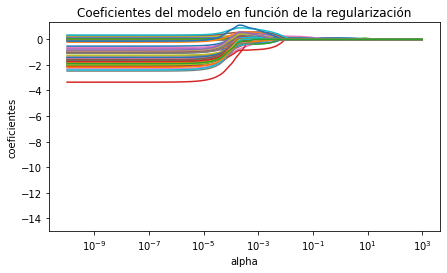

In [53]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = Lasso(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización')

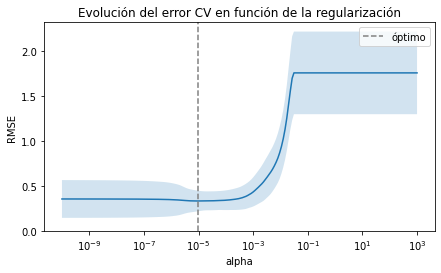

In [54]:
#Gráfico para ver cuál es el alpha optimo

# Evolución del error en función de alpha
# ==============================================================================
# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_alphas, n_folds)

mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
optimo       = modelo.alphas_[np.argmin(rmse_cv)]

# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)



ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend()

In [55]:
#grafica que mide el error con los diferentes alfas, vemos que el alfa optimos es
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 9.221978823334342e-06


In [56]:
alpha_optimo = modelo.alpha_

#Corremos una regresión LASO, con el alpha_optimo
modelo = Lasso(alpha = alpha_optimo, normalize = True)
modelo.fit(X_train, y_train)



/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

Lasso(alpha=9.221978823334342e-06, normalize=True)

In [ ]:
# nos queda ver como imprimir las BETAS para ver las  vars qme quedaron, ver la documentacion de lasso para hcer los comentarios sobre esto.
#versmo las vars que quedaron y como uqedaron los coeficientes.
#el objetivo es ver las vars socio demograficas estan impactando en enfermedades del corazón
#podemos imprimir el r2 y otras metricas de evaluacion a partir del MRSE